Time Series Algorithm, Dominique Clemons 

Data : https://www.kaggle.com/datasets/imdevskp/corona-virus-report?select=full_grouped.csv

Github : https://github.com/domoxdash/data_analytics/blob/main/covid%2019%20trends.ipnyb

Times series analysis is a way to study how variables change over time through analyzing data collected over an interval of time. It is a helpful method to understand and identify patterns and trends as well as seasonality. You can also forecast the future values based on the historical data. Time series analysis is useful for detecting patterns found in healthcare and financial related data. 

Advantages of time series data analysis includes the chance to analyze historical and future data while also interpreting the meaning of data and understand trends. It can also help understand if certain factors affect a variable during specific time periods. Disadvantages of time series data analysis include the dependency of time, while other algorithms like regression are independent of time and collected randomly. Another disadvantage is that this algorithm requires a large set of data points to make sure the data is consistent and reliable for analysis. An example of a time series model is forecasting. It allows you to predict future data based on historical trends to predict what could happen in the future. One method of carrying out forecasting is by using ARIMA, or autoregressive integreated moving average. ARIMA is used to understand a single time-dependent variable to predict future trends. 

Sars-Cov-2 (Covid-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2). The pandemic of 2019 showed how biological agents could be a potential threat to the global population. The use of data analytical skills would help predict potential global pandemics that could happen in the future. The novel coronavirus, identified  on January 7, was a new strain that had not been previously identified to cause infection in humans. We will use ARIMA to analyze and understand the trends fo COVID-19 data that was collected between January 2020 and July 2020 to predict the future amount of confirmed cases in the future. 

In [97]:
#import data and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("full_grouped.csv")
df.head(5)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [98]:
#data cleaning 
df.groupby(df['WHO Region']) #group by the Americas WHO Region
    
usa = ['Americas']
df = df.loc[df['WHO Region'].isin(usa)]

df = df.rename(columns={'Country/Region': 'Country'})
df

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
5,2020-01-22,Antigua and Barbuda,0,0,0,0,0,0,0,Americas
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas
11,2020-01-22,Bahamas,0,0,0,0,0,0,0,Americas
14,2020-01-22,Barbados,0,0,0,0,0,0,0,Americas
17,2020-01-22,Belize,0,0,0,0,0,0,0,Americas
...,...,...,...,...,...,...,...,...,...,...
35129,2020-07-27,Suriname,1483,24,925,534,44,1,35,Americas
35139,2020-07-27,Trinidad and Tobago,148,8,128,12,1,0,0,Americas
35142,2020-07-27,US,4290259,148011,1325804,2816444,56336,1076,27941,Americas
35147,2020-07-27,Uruguay,1202,35,951,216,10,1,3,Americas


In [99]:
df.dtypes

Date             object
Country          object
Confirmed         int64
Deaths            int64
Recovered         int64
Active            int64
New cases         int64
New deaths        int64
New recovered     int64
WHO Region       object
dtype: object

In [102]:
#data cleaning - checking missing data
missing = df.isnull().sum() #checking missing values

print (missing)

Date             0
Country          0
Confirmed        0
Deaths           0
Recovered        0
Active           0
New cases        0
New deaths       0
New recovered    0
WHO Region       0
dtype: int64


Text(0.5, 1.0, 'Total Confirmed Cases by Country in the Americas - WHO Region')

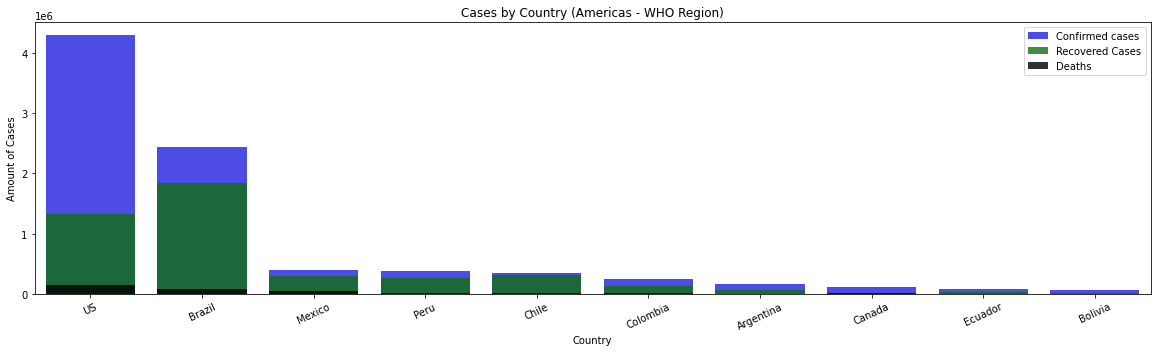

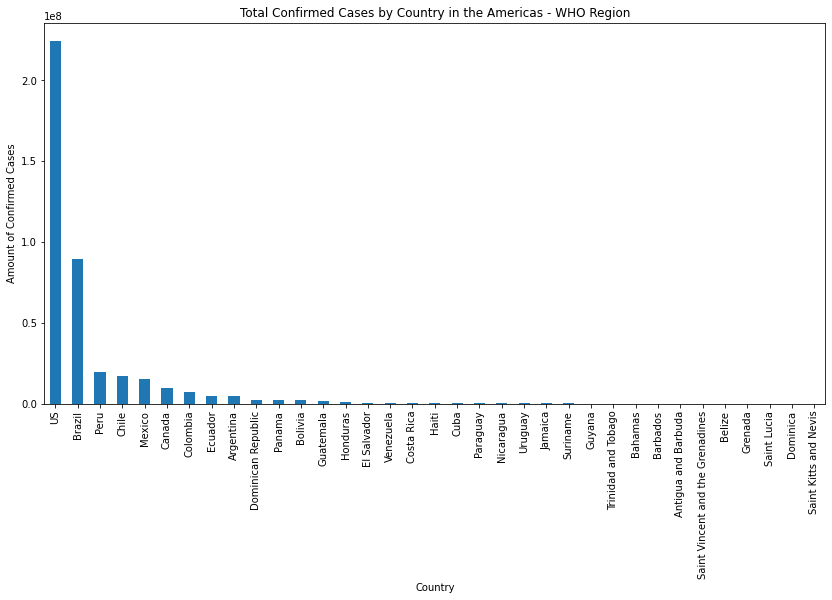

In [104]:
#Analyze the Data 
df2=df.groupby(['Country']).agg('max')

df2.sort_values('Confirmed',ascending=False,inplace=True)
df2=df2[0:10]
df2.reset_index(inplace=True)

#graph - cases by country (Americas-WHO Region)
f=plt.figure(figsize=(20,5))
ax=sns.barplot(x=df2['Country'],y=df2['Confirmed'], color='blue',alpha=0.8,label='Confirmed cases')
ax=sns.barplot(x=df2['Country'],y=df2['Recovered'],alpha=0.8, color='green', label='Recovered Cases')
ax=sns.barplot(x=df2['Country'],y=df2['Deaths'],alpha=0.8, color='black', label='Deaths')
#recovered - amount of people that recovered from the viral infection
#deaths - amount of people that passed away due to the viral infection
plt.legend()
plt.ylabel('Amount of Cases')
plt.xticks(rotation=25)
plt.title('Cases by Country (Americas - WHO Region)')

#graph - total confirmed cases overall in Americas WHO Region
plt.figure(figsize=(14, 7))
df.groupby("Country")["Confirmed"].sum().sort_values(ascending=False).plot.bar()
plt.ylabel('Amount of Confirmed Cases')
plt.title ('Total Confirmed Cases by Country in the Americas - WHO Region')

/tmp/ipykernel_94/1928580125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['Date'] = pd.to_datetime(total['Date'])


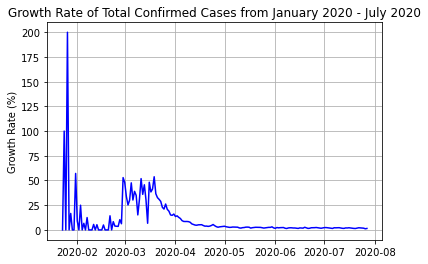

In [106]:
#analyze data based on total confirmed cases worldwide
total = df[['Date', 'Confirmed']]
total['Date'] = pd.to_datetime(total['Date'])
total=total.set_index(total['Date']).drop('Date',axis=1).resample('d').sum()
total

#graph - growth rate of total amount of confirmed cases 
total['Growth Rate'] = (total["Confirmed"] - total["Confirmed"].shift(1)) / total["Confirmed"].shift(1) * 100
#Growth Rate = ((New Value - Old Value) / Old Value)
plt.plot(total.index, total['Growth Rate'], linestyle='-', color='blue')
plt.xlabel(None)
plt.ylabel('Growth Rate (%)')
plt.title("Growth Rate of Total Confirmed Cases from January 2020 - July 2020")
plt.grid(True)

Exploratory Data Analysis Summary
The United States has the highest amount of confirmed, recovered and death cases in the Americas Region. This could be due to a potentially higher population size, increased means of testing and standardized reporting systems implemented by the CDC, FDA and governmental agencies. The growth rate is a graph that shows the change in a variable over time. The growth rate of total confirmed cases shows that the total number of cases peaked in January 2020, followed by smaller peaks in March and a steady decline from April through July. This could be due to factors such as the normal respiratory viral season (winter to spring), low mask usage, or even decreased testing during the lowered times. 

In [108]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


Steps for ARIMA 
The ARIMA model is used to create a time series that contains data with a constant mean and variance. 
    1. Differencing - parameter (d), determines the amount of times the operation will be applied to the time series 
    2. An autoregressive model - parameter (p), estimates the value for time (t) as a linear combination of (p), where (p) is a parameter set by the user. 
    3. Moving Average Model - estimates the value for time (t) as the mean of the series plus a linear combination of errors from (q). The number of previous time steps to take into account is a parameter set by the user. 
    4. Model Evaluation - forecasts the future and compare forecasts with real current testing data. 
    5. Metrics - measures the validity of the model


In [110]:
import pmdarima as pmd
from pmdarima import auto_arima

from statsmodels.tsa.arima.model import ARIMA

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

from math import sqrt
from sklearn.metrics import mean_squared_error

In [112]:
#Summarize the data
stepwise_fit_confrimed = auto_arima(total["Confirmed"],trace=True,suppress_warnings=True)
stepwise_fit_confrimed.summary()

from pmdarima.model_selection import train_test_split
#split data
train= total.iloc[:-30]
test= total.iloc[-30:]

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=3953.457, Time=0.32 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3972.793, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3974.766, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3974.776, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=3950.715, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=3941.666, Time=0.05 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=3944.239, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=3956.572, Time=0.05 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=3919.311, Time=0.13 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=3849.491, Time=0.33 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=3865.670, Time=0.40 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=3919.465, Time=0.28 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=3942.221, Time=0.20 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=3861.060, Time=0.34 sec
 ARIMA(3,2,4)(0,0,0)[0]          

In [113]:
#ARIMA - model 
model_confirmed = ARIMA(train["Confirmed"],order=(3,2,4))
model_confirmed = model_confirmed.fit()
model_confirmed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Confirmed   No. Observations:                  158
Model:                 ARIMA(3, 2, 4)   Log Likelihood               -1583.306
Date:                Mon, 27 Nov 2023   AIC                           3182.613
Time:                        23:26:48   BIC                           3207.011
Sample:                    01-22-2020   HQIC                          3192.522
                         - 06-27-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4198      0.522      0.804      0.421      -0.604       1.443
ar.L2          0.3419      0.446      0.766      0.444      -0.533       1.216
ar.L3         -0.2214      0.138     -1.603      0.109      -0.492       0.049
ma.L1         -0.7724      0.554     -1.394      0.163      -1.858       0.314
ma.L2         -0.7788      0.644     -1.210      0.226      -2.040       0.483
ma.L3          0.6817      0.205      3.326      0.001       0.280       1.083
ma.L4          0.1969      0.375      0.526      0.599      -0.537       0.931
sigma2      4.787e+07      1e-07   4.77e+14      0.000    4.79e+07    4.79e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               758.45
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):            8855.03   Skew:                             1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.56e+30. Standard errors may be unstable.
"""

In [115]:
#prediction 
start = len(train)
end = len(total)-1
pred = model_confirmed.predict(start=start,end=end,typ="levels")
print(pred)

2020-06-28    5.143833e+06
2020-06-29    5.249780e+06
2020-06-30    5.359334e+06
2020-07-01    5.471883e+06
2020-07-02    5.586344e+06
2020-07-03    5.701832e+06
2020-07-04    5.817742e+06
2020-07-05    5.933758e+06
2020-07-06    6.049734e+06
2020-07-07    6.165637e+06
2020-07-08    6.281472e+06
2020-07-09    6.397261e+06
2020-07-10    6.513026e+06
2020-07-11    6.628779e+06
2020-07-12    6.744528e+06
2020-07-13    6.860278e+06
2020-07-14    6.976030e+06
2020-07-15    7.091783e+06
2020-07-16    7.207537e+06
2020-07-17    7.323291e+06
2020-07-18    7.439046e+06
2020-07-19    7.554801e+06
2020-07-20    7.670556e+06
2020-07-21    7.786311e+06
2020-07-22    7.902066e+06
2020-07-23    8.017821e+06
2020-07-24    8.133576e+06
2020-07-25    8.249330e+06
2020-07-26    8.365085e+06
2020-07-27    8.480840e+06
Freq: D, Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Date'>

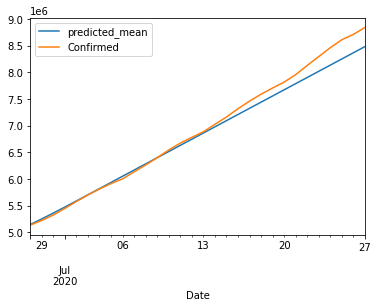

In [116]:
#prediction plot, modeling data beyond July 2020
pred.plot(legend=True)
test["Confirmed"].plot(legend=True)

/home/53c5e5b4-da5e-4f04-a859-a142ed899dea/.local/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(4,1,1)(2,0,0)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/home/53c5e5b4-da5e-4f04-a859-a142ed899dea/.local/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/home/53c5e5b4-da5e-4f04-a859-a142ed899dea/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/home/53c5e5b4-da5e-4f04-a859-a142ed899dea/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/home/53c5e5b4-da5e-4f04-a859-a142ed899dea/.local/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/opt/c

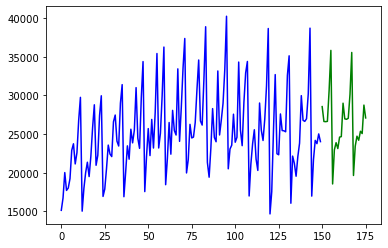

In [117]:


y = pmd.datasets.load_wineind()
train, test = train_test_split(y, train_size=150)

# Fit model
model = pmd.auto_arima(train, seasonal=True, m=12)

# make forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:150], train, c='blue')
plt.plot(x[150:], forecasts, c='green')
plt.show()



In [118]:
#metrics to evaluate model 
from math import sqrt
from sklearn import metrics

#MAE - represents average error = sum(actual = prediction) / number of observations
#print ('Mean Absolute Error : ', metrics.mean_absolute_error(pred, test['Confirmed']))
#print ('Mean Squared Error : ', metrics.mean_squared_error(pred, test['Confirmed']))
#print ('Mean Squar Root of Error : ', np.sqrt(metrics.mean_squared_error(pred, test['Confirmed'])))

# I was not able to validate the arima model due to various errors. 


In [119]:
#linear regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime

covid = df
covid['Date'] = pd.to_datetime(covid['Date'], dayfirst=True)
covid = covid.rename(columns={'Confirmed': 'target'})

print(covid.corr())

                 target    Deaths  Recovered    Active  New cases  New deaths  \
target         1.000000  0.973484   0.901201  0.962781   0.919945    0.631174   
Deaths         0.973484  1.000000   0.843340  0.954973   0.889651    0.685388   
Recovered      0.901201  0.843340   1.000000  0.750722   0.846012    0.564113   
Active         0.962781  0.954973   0.750722  1.000000   0.875359    0.605413   
New cases      0.919945  0.889651   0.846012  0.875359   1.000000    0.773688   
New deaths     0.631174  0.685388   0.564113  0.605413   0.773688    1.000000   
New recovered  0.654318  0.620466   0.759967  0.522889   0.687658    0.511217   

               New recovered  
target              0.654318  
Deaths              0.620466  
Recovered           0.759967  
Active              0.522889  
New cases           0.687658  
New deaths          0.511217  
New recovered       1.000000  


The correlation function shows that the confirmed cases have a positive correlation with the new cases.

Text(0.5, 1.0, 'Confirmed Cases against New cases of Covid-19')

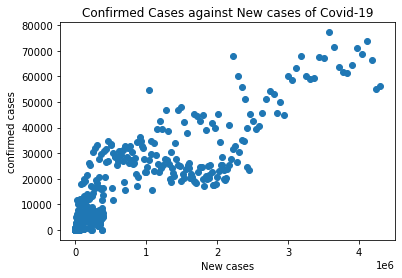

In [123]:
# Plot a scatter plot
X = covid['target']
y = covid['New cases']
plt.scatter(X, y)
plt.xlabel('New cases')
plt.ylabel('confirmed cases')
plt.title('Confirmed Cases against New cases of Covid-19')

In [124]:
#Splitting the dataset

x_covid = covid.loc[:, ['target']]
y_covid = covid['New cases']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_covid, y_covid, test_size=0.3,random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)




from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train, y_train)
print('R-squared: %.4f' % model2.score(X_test, y_test)) #coefficient of determination

#Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X_train[["target"]], y_train)

print(lin_reg.predict(X_test[["target"]])) #predictions

(4606, 1) (4606,)
(1974, 1) (1974,)
R-squared: 0.8341
[8333.77820646 1274.52043063  258.51088758 ...  258.51088758  377.09683551
  260.24688447]


Summary

This linear regression model shows a 83% accuracy score and indicates that this model is a good predictor of future daily amount of Confirmed Covid-19 cases. The one way to improve this model is to increase the data set size and include values over a longer period of time. My data set was limited in size by having a maximum of 6 months of information. If more information was collected, it may have increased the accuracy of the prediction model.
The R squared value is the coefficient of determination and shows how well the model can predict values. The score from the linear regression model is 83% and may correlate to a good model. I was not able to validate the ARIMA model due to errors displaying inconsistencies of the data sizes and wrong data types. We will move forward with the linear regression model since it was validated at over 80% accuracy. 

In [137]:
import pickle
from sklearn.datasets import make_regression
pickle.dump(model2, open('model.pkl', "wb"))  

X_val = 4

model_model = pickle.load(open('model.pkl', "rb"))
result = model_model.predict([[X_val]])
#prob = model_model.predict_proba([[x_val]]) #linear regression does not support predict_proba function
print(result)
#print(prob)  # It returns 2 values. The first one is the probability of getting False, The second one is the probability of getting True.

[258.58032745]


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


References

Time Series Analysis : https://www.tableau.com/learn/articles/time-series-analysis
ARIMA : https://pypi.org/project/pmdarima/
ARIMA Validation : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9885024/
